In [1]:
from minitorch.engine import Node
import random

In [2]:
from graphviz import Digraph

def trace(root:Node):  
    # build set of nodes and edges using dfs
    nodes,edges=set(),set()

    # dfs traversal + added in topological ordering
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)     # root contains one output which is linked to all nodes
    return nodes,edges

def draw_dot(root:Node):
    dot=Digraph(format='svg',graph_attr={'rankdir':'LR'})
    nodes,edges=trace(root)

    for n in nodes:     # for all Node nodes....
        uid=str(id(n))

        # create a node for the current node
        dot.node(name=uid,label="{data %.3f | grad %.4f}" %(n.data,n.grad),shape='record')

        if n._op:
            # every Node node in present in nodes, even hidden ones
            # all you do here is create the operation nodes to visualize what operation they were created with
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    
    for n1,n2 in edges:
        # connect n1 to the op node of n2 since n2 is made from n1
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    
    return dot

In [3]:
a=Node(2.0); 
b=Node(3.0); 

c=a**5;          # 8
d=a+b;           # 5
e=a*b;           # 6

f=c*d;           # 40
g=d+e;           # 11

h=f*g;           # 440
i=h/1000;        # 0.44
t=i.relu();      # tanh(0.44)
t.backward()                # compute gradients

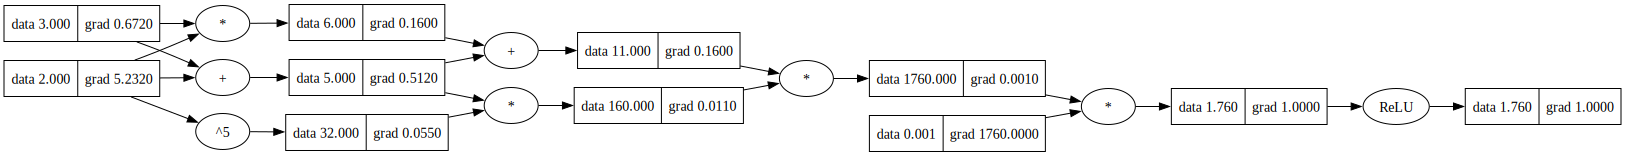

In [4]:
draw_dot(t)

In [1]:
import torch

x1=torch.tensor([0.02]).double(); x1.requires_grad=True
x2=torch.tensor([0.02]).double(); x2.requires_grad=True
w1=torch.tensor([0.1]).double(); w1.requires_grad=True
w2=torch.tensor([0.1]).double(); w2.requires_grad=True
b=torch.tensor([0.02]).double(); b.requires_grad=True

a=x1*w1+x2*w2+b
o=torch.tanh(a)

print(o.item())
o.backward()

print('-------')
print(x1.grad.item())
print(w1.grad.item())
print(x2.grad.item())
print(w2.grad.item())

0.023995392584873126
-------
0.09994242360272793
0.019988483975916516
0.09994242360272793
0.019988483975916516
